<b>Objective : COVID_19 Prediction

Importing python libraries

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading data from the .csv file

In [192]:
data=pd.read_csv('Covid.csv')

In [193]:
data.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Unnamed: 18
0,Alabama,US,21-05-2020 02:32,32.3182,-86.9023,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,NaN
1,Alaska,US,21-05-2020 02:32,61.3707,-152.4044,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,NaN
2,American Samoa,US,21-05-2020 02:32,-14.2710,-170.1320,0,0,NaN,0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,NaN
3,Arizona,US,21-05-2020 02:32,33.7298,-111.4312,14906,747,3773.0,10386,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,NaN
4,Arkansas,US,21-05-2020 02:32,34.9697,-92.3731,5003,107,3852.0,1044,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,NaN
5,California,US,21-05-2020 02:32,36.1162,-119.6816,85997,3497,NaN,82500,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN,NaN
6,Colorado,US,21-05-2020 02:32,39.0598,-105.3111,22797,1299,3478.0,18020,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774,NaN
7,Connecticut,US,21-05-2020 02:32,41.5978,-72.7554,39017,3529,6264.0,29224,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438,NaN
8,Delaware,US,21-05-2020 02:32,39.3185,-75.5071,8194,310,3965.0,3919,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN,NaN
9,Diamond Princess,US,21-05-2020 02:32,NaN,NaN,49,0,NaN,49,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN,NaN


In [194]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate', 'Unnamed: 18'],
      dtype='object')

----

Checking Null Values in data dataframe

In [195]:
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
Unnamed: 18             58
dtype: int64

We can see few columns are having null values. Specially Recovered , People_tested and People_Hospitalised columns which can be crucial for our analysis.

Rest of the Columns like Latitude and Longitude can be dropped off. Below is the work around for handling Null Values :

In [196]:
# Dropping unneccesary columns before working on NULL values
data.drop(['Lat','Long_','Unnamed: 18','FIPS','UID','ISO3','Hospitalization_Rate'], axis=1,inplace=True)

In [197]:
# checking the total number of Rows \ Records for Recovered Column having Null values

data[data['Recovered'].isnull()]

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate
0,Alabama,US,21-05-2020 02:32,13052,522,NaN,12530,266.194321,164450.0,1493.0,3.999387,3353.942386
2,American Samoa,US,21-05-2020 02:32,0,0,NaN,0,0.000000,124.0,NaN,NaN,222.857246
5,California,US,21-05-2020 02:32,85997,3497,NaN,82500,217.646575,1380120.0,NaN,4.066421,3492.893832
9,Diamond Princess,US,21-05-2020 02:32,49,0,NaN,49,NaN,NaN,NaN,0.000000,NaN
11,Florida,US,21-05-2020 02:32,47471,2096,NaN,45375,221.024217,771348.0,8934.0,4.415327,3591.383953
12,Georgia,US,21-05-2020 02:32,39801,1697,NaN,38104,374.864974,402940.0,7107.0,4.263712,3795.082856
13,Grand Princess,US,21-05-2020 02:32,103,3,NaN,100,NaN,NaN,NaN,2.912621,NaN
17,Illinois,US,21-05-2020 02:32,100418,4525,NaN,95893,792.451219,642713.0,NaN,4.506164,5071.986102
18,Indiana,US,21-05-2020 02:32,29274,1864,NaN,27410,434.834339,195738.0,4389.0,6.367425,2907.481174
25,Massachusetts,US,21-05-2020 02:32,88970,6066,NaN,82904,1290.822797,489953.0,8897.0,6.818029,7108.491647


Total 16 rows are having Null values for Recovered. We will check if it is evenly distributed or inclined towards right\left to choose on mean or median value to replace NULLs.

Similarly, we will be working on follwing columns as well to handle Null Values : 

'People_Hospitalized','Incident_Rate','People_Tested','Hospitalization_Rate'

---

<AxesSubplot:>

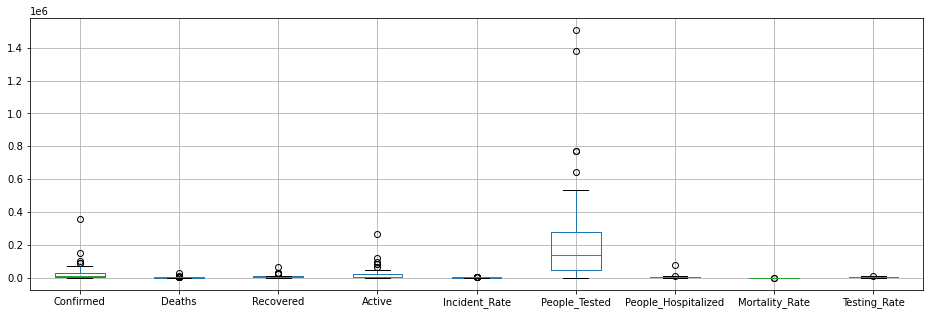

In [198]:
# checking on Boxplot to identify outlier. But here we can have as many cases as possible.
# to identify we can check if any if the column is not having any -ve value, which is obviously false. 
# from below plot graph we can see there is no -ve value for any effective column. So we are good with outliers.
plt.figure(figsize=(16,5))
data.boxplot()

array([[<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>],
       [<AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'Incident_Rate'}>,
        <AxesSubplot:title={'center':'People_Tested'}>],
       [<AxesSubplot:title={'center':'People_Hospitalized'}>,
        <AxesSubplot:title={'center':'Mortality_Rate'}>,
        <AxesSubplot:title={'center':'Testing_Rate'}>]], dtype=object)

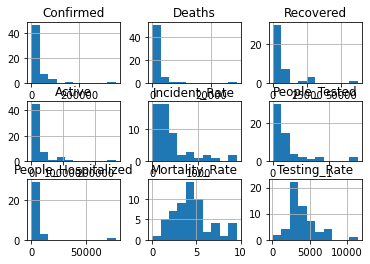

In [199]:
# working on Histogram on various columns
data.hist()

 Here , Many of the columns are diverted towards left. So , whenever we have data inclined towards right \ Left we use median to replace Null values instead of mean. We will be working on same direction in handling Null data.

----

We here are creating one user-defined function which will allow us to fill all NULL values in particular column with its Median value. Below is the execution steps for same.

In [200]:
# Creating med() function to call median() method
def med(a):
    return a.fillna(a.median())

In [201]:
# Checking on one column ('Confirmed column') , if it is working fine or not.
data.Confirmed=data['Confirmed'].transform(med)

In [202]:
# checking Null Values again.
data.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered              16
Active                  0
Incident_Rate           2
People_Tested           2
People_Hospitalized    25
Mortality_Rate          1
Testing_Rate            2
dtype: int64

As we can see, Confirmed column null values are placed with median. We will be working on rest of the other columns as from plot graph we could see rest of the columns had the similar behaviour.

In [203]:
# Working on rest of the columns with NULL 
data.Recovered=data['Recovered'].transform(med)
data.Incident_Rate=data['Incident_Rate'].transform(med)
data.People_Tested=data['People_Tested'].transform(med)
data.People_Hospitalized=data['People_Hospitalized'].transform(med)
data.Mortality_Rate=data['Mortality_Rate'].transform(med)
data.Testing_Rate=data['Testing_Rate'].transform(med)

In [204]:
# Data is clean with no NULL Values
data.isnull().sum()

Province_State         0
Country_Region         0
Last_Update            0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Incident_Rate          0
People_Tested          0
People_Hospitalized    0
Mortality_Rate         0
Testing_Rate           0
dtype: int64

---

Checking Max value for Deaths, Recovered and Active cases

In [205]:
max(data.Deaths), max(data.Recovered), max(data.Active)

(28636, 61886.0, 263848)

In [206]:
# Looking for Statistical data.
data.describe()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,26756.086207,1611.017241,5904.137931,20070.724138,391.204822,2.228466e+05,3430.017241,4.457301,3879.552237
std,52562.031122,4084.750891,10064.152778,41294.705318,396.463546,2.939333e+05,10024.887841,2.116203,1900.557214
min,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058
25%,2596.000000,74.000000,1281.750000,812.500000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521
50%,10148.500000,385.000000,3008.000000,5644.500000,250.477287,1.386545e+05,1493.000000,4.403318,3469.782532
75%,29395.500000,1394.250000,4383.750000,19291.250000,462.828082,2.620348e+05,1722.750000,5.450908,4622.586404
max,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424690


Observation :

1. out of total confirmed cases : 354370 , 28636 deaths have taken place in overall US region.
2. Simlarly 61886 has recovered whereas 263848 are active cases.

In [207]:
# Data corelation in statistical form
data.corr()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate
Confirmed,1.000000,0.982191,0.793441,0.985218,0.713360,0.828190,0.858569,0.382766,0.336160
Deaths,0.982191,1.000000,0.811694,0.954378,0.713560,0.742632,0.899983,0.427304,0.347261
Recovered,0.793441,0.811694,1.000000,0.680043,0.537482,0.652961,0.722819,0.316590,0.253766
Active,0.985218,0.954378,0.680043,1.000000,0.705566,0.829952,0.827144,0.367845,0.324917
Incident_Rate,0.713360,0.713560,0.537482,0.705566,1.000000,0.443694,0.543825,0.371817,0.621457
People_Tested,0.828190,0.742632,0.652961,0.829952,0.443694,1.000000,0.624709,0.234981,0.232459
People_Hospitalized,0.858569,0.899983,0.722819,0.827144,0.543825,0.624709,1.000000,0.303147,0.280916
Mortality_Rate,0.382766,0.427304,0.316590,0.367845,0.371817,0.234981,0.303147,1.000000,0.170826
Testing_Rate,0.336160,0.347261,0.253766,0.324917,0.621457,0.232459,0.280916,0.170826,1.000000


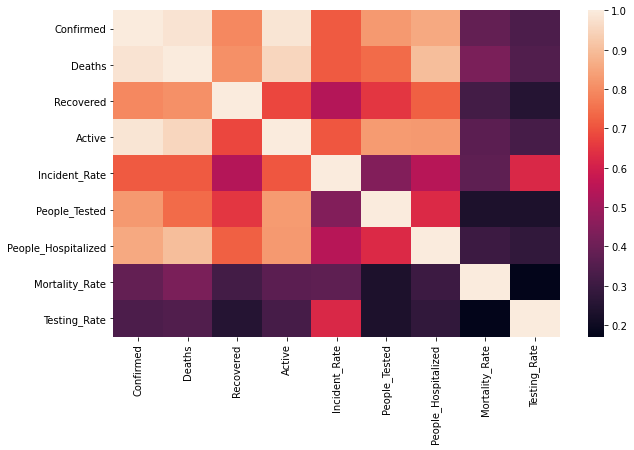

In [208]:
# Heatmap presentation of correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())
plt.show()

Columns like confirmed , Deaths  are highly related to Active cases.
People_Hospitalised related to Active Cases.

In [209]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate'],
      dtype='object')

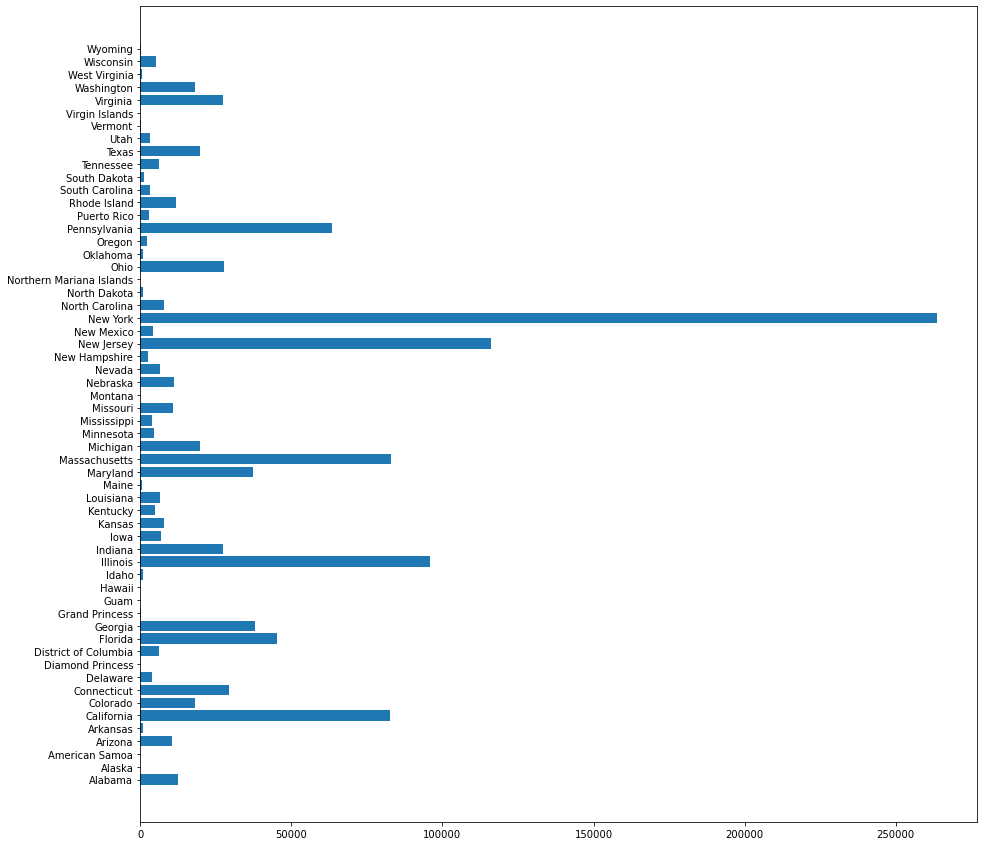

In [210]:
#Checking Active cases State wise graphically.

from matplotlib.pyplot import figure
figure(num=None,figsize=(15,15))
plt.barh(data['Province_State'],data['Active'])
plt.show()

New York is having Maximum number of Active cases whereas States like Hawaii , Alaska is having 0 Active cases. Rest New Jersey is the second Highest State reporting Active Cases. 

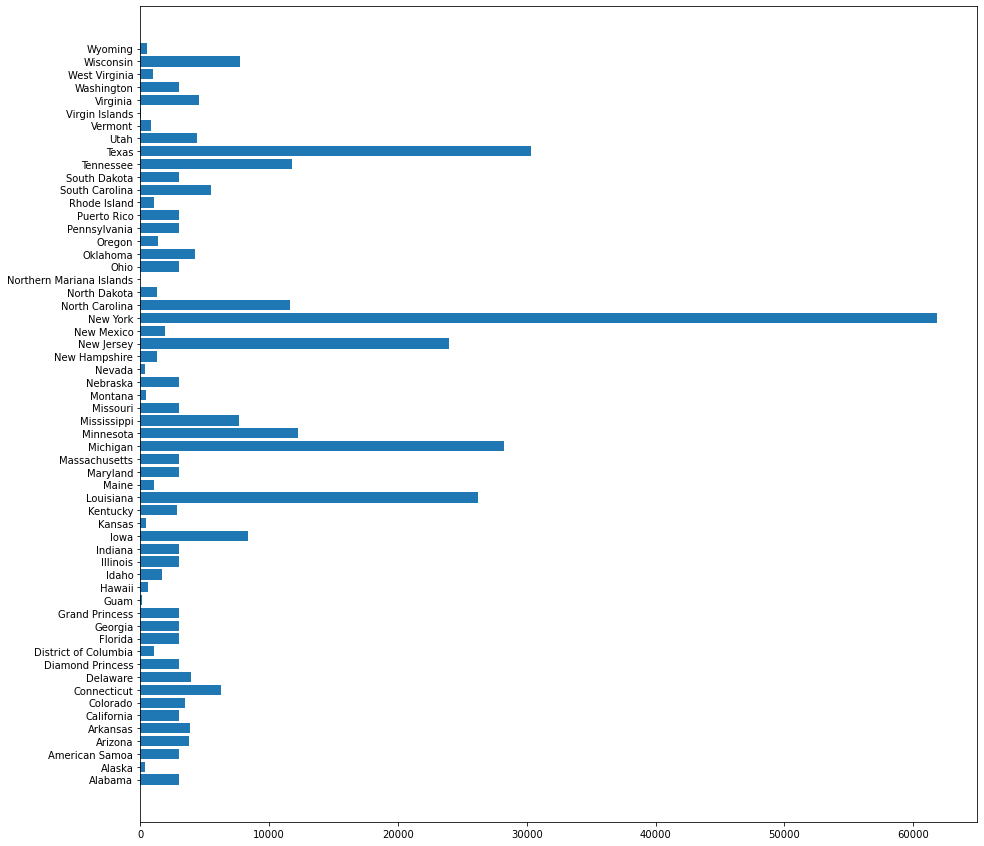

In [211]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(15,15))
plt.barh(data['Province_State'],data['Recovered'])
plt.show()

New York is having Maximum number of Recovered cases whereas States like Guam , Northern Mariana Islands are having very less recovered cases. Rest, Texas is the second Highest State reporting Recovered Cases. 

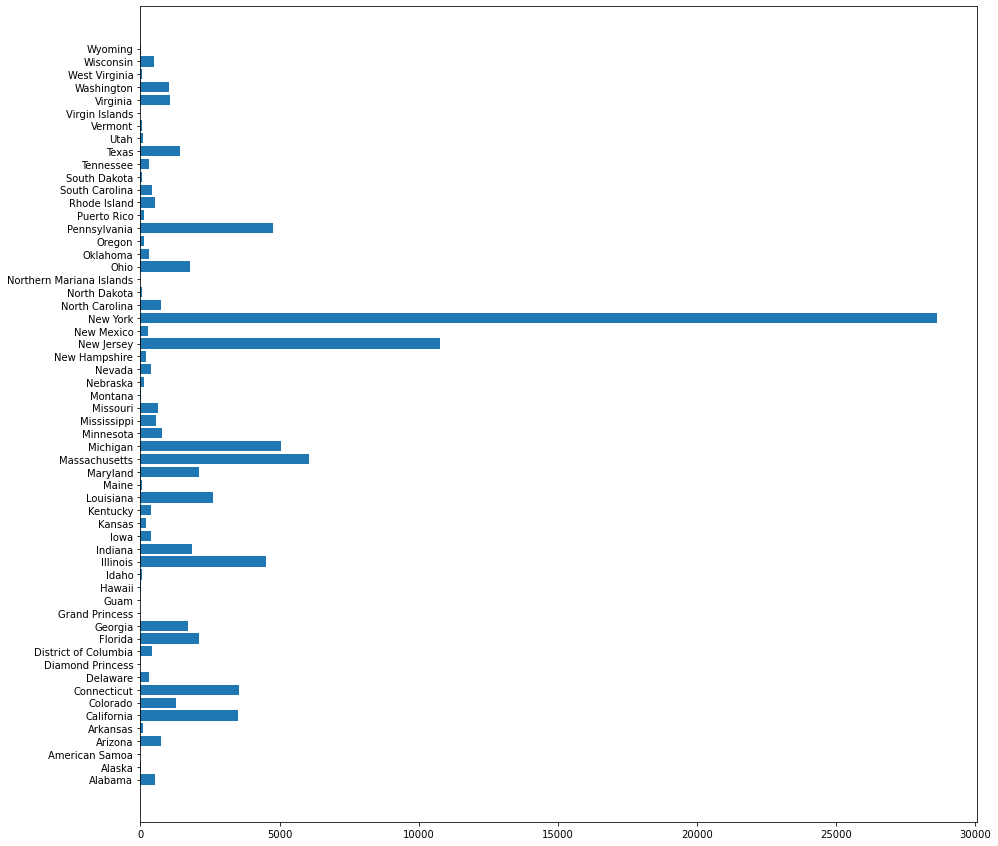

In [212]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(15,15))
plt.barh(data['Province_State'],data['Deaths'])
plt.show()

New York is having Maximum number of Death cases followed by New Jersey whereas States like Alaska , Montana are having 0 Death cases. 

-----

Converting Province_State Column as Index using set_index() Method, To make better respresentation of data statewise.

In [213]:
data=data.set_index('Province_State',drop=True)
data

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate
Province_State,,,,,,,,,,,
Alabama,US,21-05-2020 02:32,13052,522,3008.0,12530,266.194321,164450.0,1493.0,3.999387,3353.942386
Alaska,US,21-05-2020 02:32,401,10,352.0,39,54.815493,37045.0,1493.0,2.493766,5063.940017
American Samoa,US,21-05-2020 02:32,0,0,3008.0,0,0.000000,124.0,1493.0,4.403318,222.857246
Arizona,US,21-05-2020 02:32,14906,747,3773.0,10386,204.788838,165435.0,1792.0,5.011405,2272.859351
Arkansas,US,21-05-2020 02:32,5003,107,3852.0,1044,165.782801,96258.0,535.0,2.138717,3189.670370
California,US,21-05-2020 02:32,85997,3497,3008.0,82500,217.646575,1380120.0,1493.0,4.066421,3492.893832
Colorado,US,21-05-2020 02:32,22797,1299,3478.0,18020,395.868121,131837.0,3955.0,5.698118,2289.339188
Connecticut,US,21-05-2020 02:32,39017,3529,6264.0,29224,1094.357902,190718.0,10946.0,9.044775,5349.302875
Delaware,US,21-05-2020 02:32,8194,310,3965.0,3919,841.476990,45412.0,1493.0,3.783256,4663.552976


---

# Data Visualisation

<b> Using Stack graph to club all the columns region wise to ease the understanding towards data.

<AxesSubplot:ylabel='Province_State'>

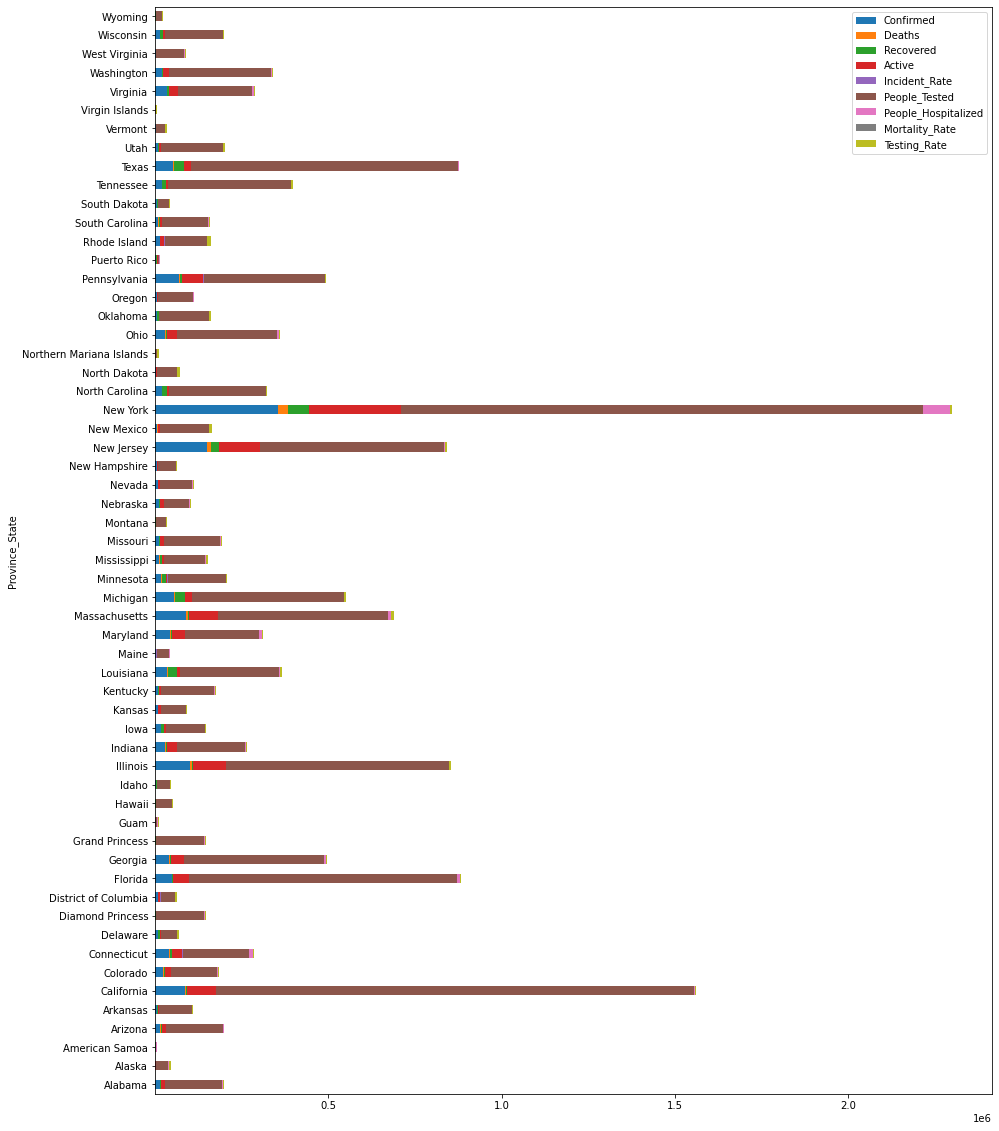

In [214]:
#plotting based on stacking
data.plot.barh(stacked=True,figsize=(15,20))

Observation :
    
    Number of tests were highly performed in all the states.
    New York has highest number of recovered , dead and Active cases.
    Virgin Islands and American Samoa States are the safest States.

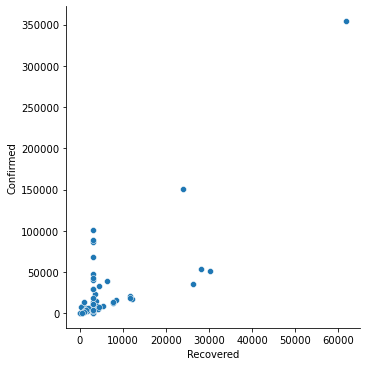

In [215]:
#relation between Confirmed cases and recovered cases

sns.relplot(x='Recovered',y='Confirmed',data=data)

In Both above and Below Graphs Confirmed , Deaths and Recovered Cases are directly related to each other proportionally. 

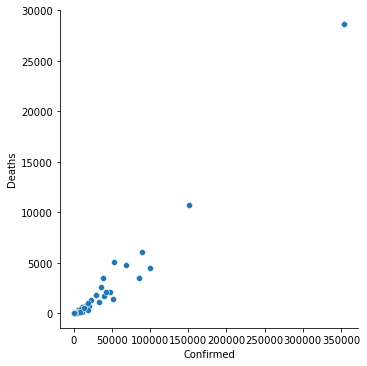

In [216]:
sns.relplot(x='Confirmed',y='Deaths',data=data)

Plotting all the data in pairplot.

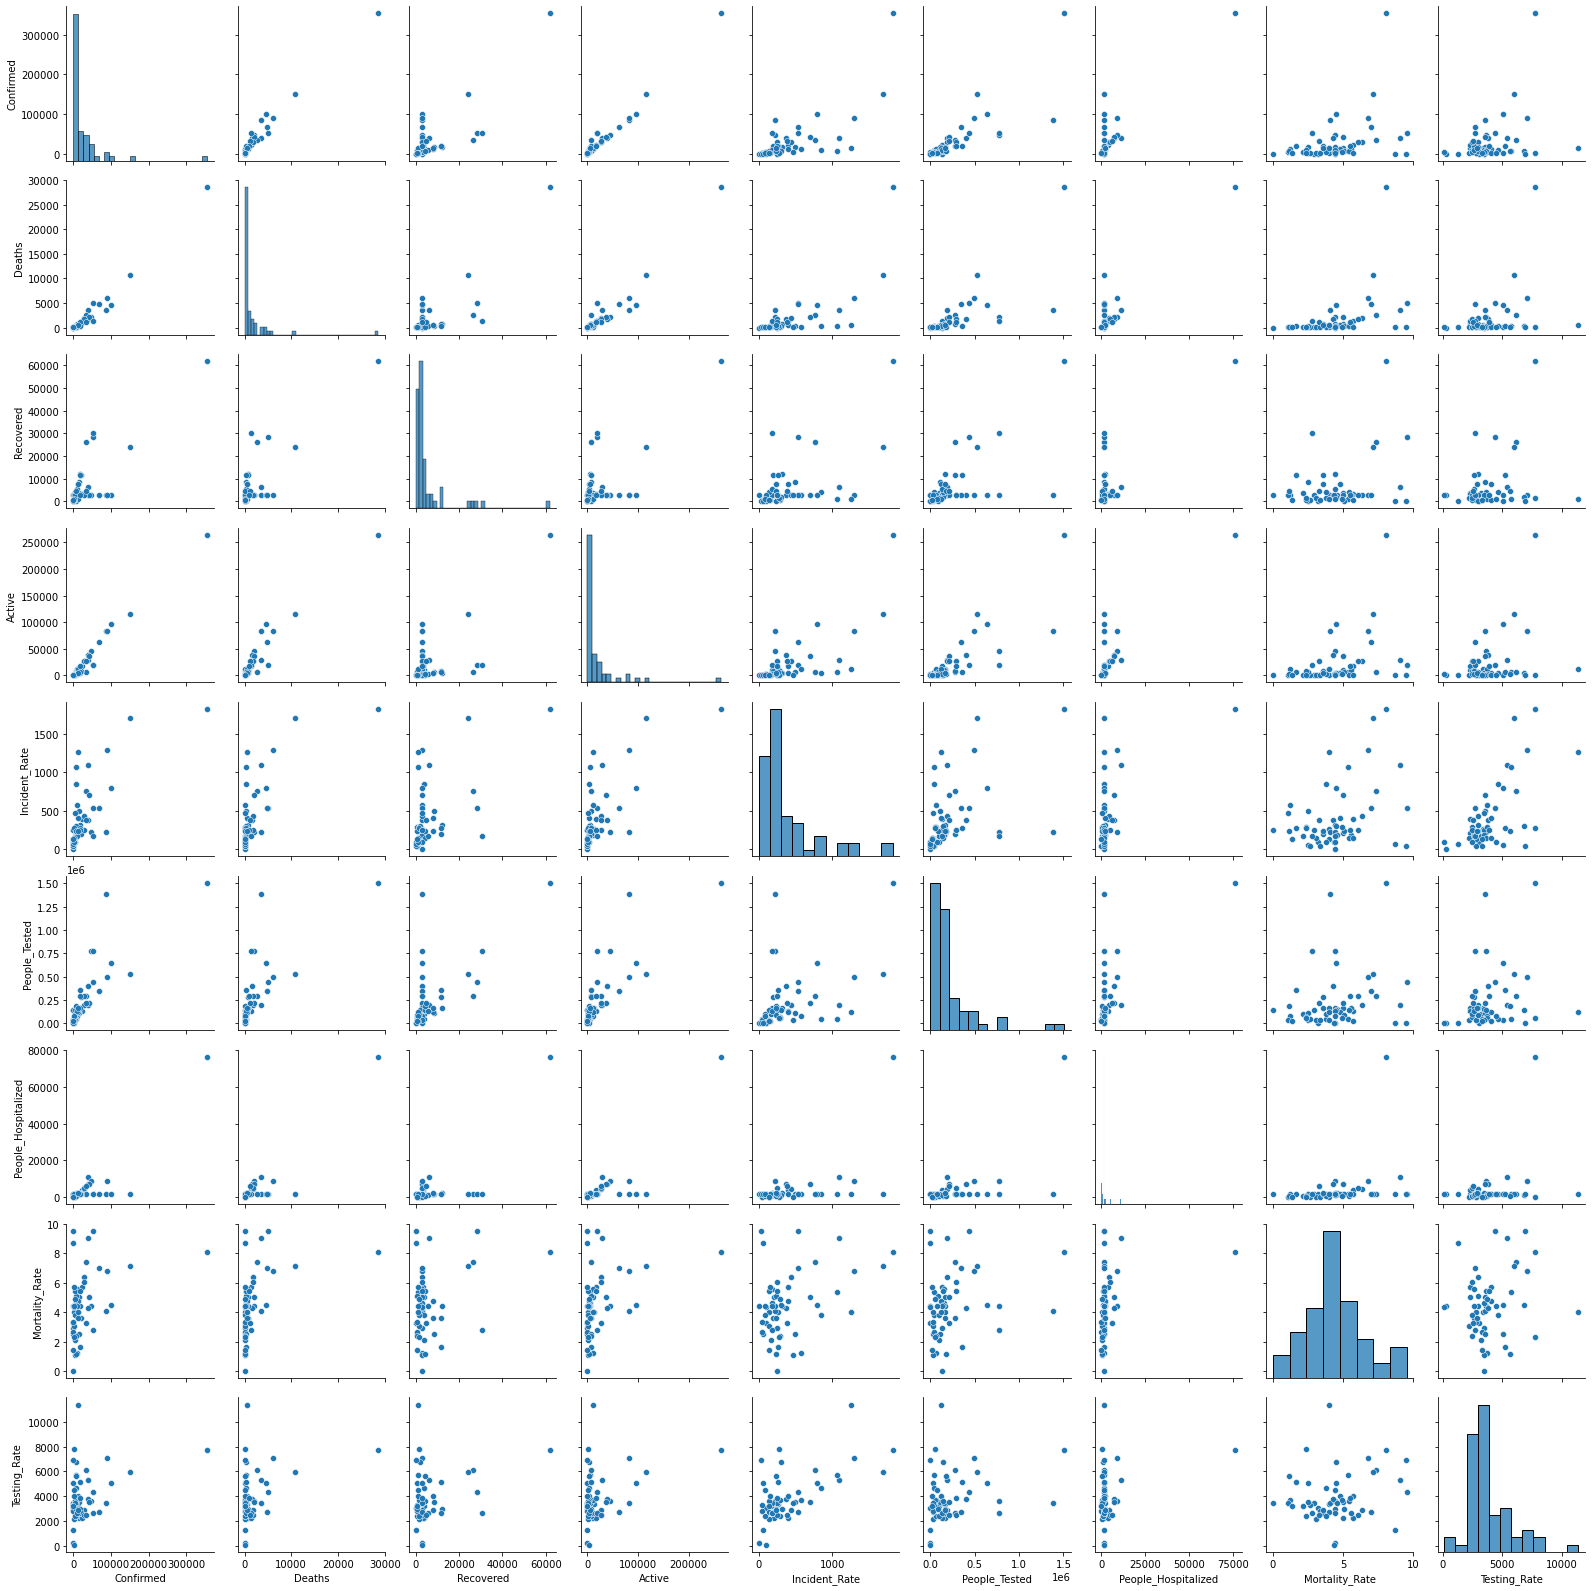

In [217]:
sns.pairplot(data)

----

# Choosing the best model for our case

In [218]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [219]:
data.columns

Index(['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate'],
      dtype='object')

<b> Scaling the data for Train and Test data

In [220]:
y=data['Confirmed']
x=data.drop(['Country_Region','Last_Update','Confirmed','Deaths','Active','Incident_Rate','People_Tested','People_Hospitalized',
       'Mortality_Rate','Testing_Rate'],axis=1)
x,y

(                          Recovered
 Province_State                     
 Alabama                      3008.0
 Alaska                        352.0
 American Samoa               3008.0
 Arizona                      3773.0
 Arkansas                     3852.0
 California                   3008.0
 Colorado                     3478.0
 Connecticut                  6264.0
 Delaware                     3965.0
 Diamond Princess             3008.0
 District of Columbia         1059.0
 Florida                      3008.0
 Georgia                      3008.0
 Grand Princess               3008.0
 Guam                          125.0
 Hawaii                        578.0
 Idaho                        1668.0
 Illinois                     3008.0
 Indiana                      3008.0
 Iowa                         8362.0
 Kansas                        473.0
 Kentucky                     2826.0
 Louisiana                   26249.0
 Maine                        1100.0
 Maryland                     2993.0
 

In [221]:
# Taking 80% of our data as trained data for better results
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [222]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ', m,'is : ', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('errors :')
    print('mean_absolute_error ',mean_absolute_error(y_test,predm))
    print('mean_squared_error ', mean_squared_error(y_test,predm))
    print('Root Mean ',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score',r2_score(y_test,predm))
    print('*************************************************************************************')
    print('\n')

score of  LinearRegression() is :  0.25025633114866297
errors :
mean_absolute_error  33293.94644374271
mean_squared_error  3956101919.360714
Root Mean  62897.550980628126
r2_score 0.5636774199217647
*************************************************************************************


score of  DecisionTreeRegressor() is :  0.7034452519316929
errors :
mean_absolute_error  41828.333333333336
mean_squared_error  8128753939.875
Root Mean  90159.60259381693
r2_score 0.10347130479375544
*************************************************************************************


score of  KNeighborsRegressor() is :  0.365342846340477
errors :
mean_absolute_error  39705.5
mean_squared_error  7962297556.726666
Root Mean  89231.70712659636
r2_score 0.12182995177661893
*************************************************************************************


score of  SVR() is :  -0.12786480283354917
errors :
mean_absolute_error  45440.755873602255
mean_squared_error  10622645312.398016
Root Mean  1030

Here, Decision Tree best fits the model for Recovery data with accuracy score more than .9 and less number of error scopes compared to other models.

score of  DecisionTreeRegressor() is :  0.9023105079792606
errors :
mean_absolute_error  12464.444444444445
mean_squared_error  338877363.7037037
Root Mean  18408.621993612225
r2_score -0.7483418793722498


Hence,Choosing the Decision tree

In [223]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

In [224]:
# Predict
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)


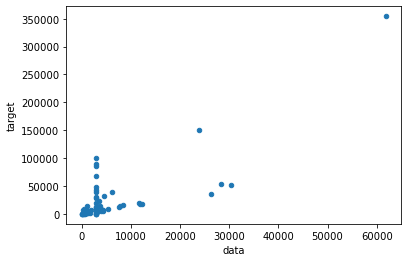

In [225]:
plt.figure()
plt.scatter(x, y, s=20, label="data")
plt.plot(x_test, y_1,
         label="max_depth=2")
plt.plot(x_test, y_2)
plt.xlabel("data")
plt.ylabel("target")
plt.show()

In [226]:

from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

[Text(446.4, 498.3, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(377.7230769230769, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(515.0769230769231, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(274.7076923076923, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(137.35384615384615, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(68.67692307692307, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(206.03076923076924, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(480.73846153846154, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(412.0615384615385, 45.2

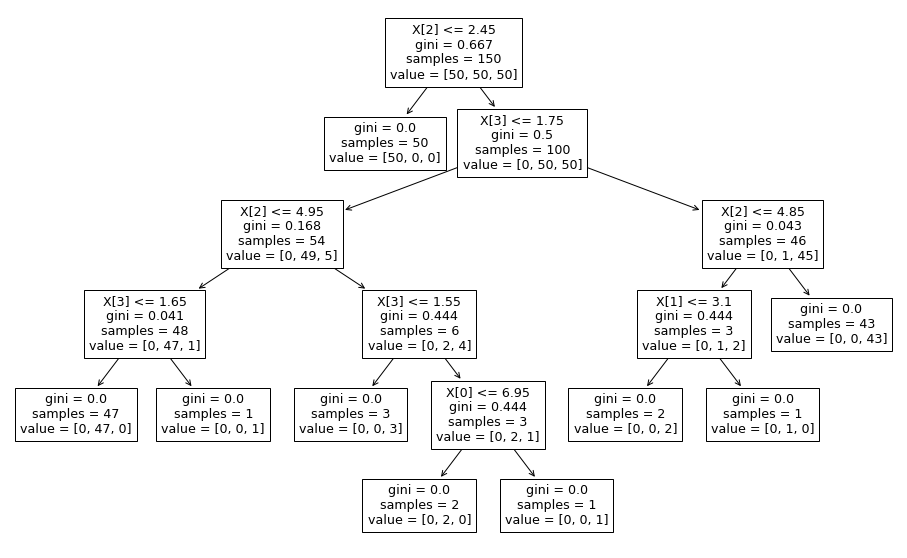

In [227]:
plt.figure(figsize=(16,10))
tree.plot_tree(clf) 
